In [7]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [50]:
filename = 'test3.png'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [51]:
# find Harris corners
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)

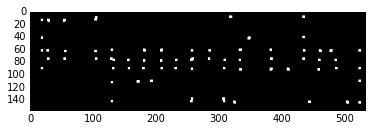

In [52]:
plt.imshow(dst ,cmap = 'gray')

In [53]:
# find centroids
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)

66
(156, 533)
(66, 5)
(66, 2)


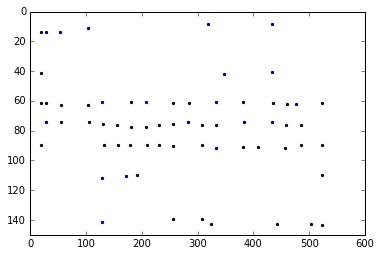

In [64]:
print ret
print labels.shape
print stats.shape
print centroids.shape
plt.ylim(150,0)
plt.xlim(0,600)
plt.scatter(centroids[1:,0],centroids[1:,1],marker='.')

In [55]:
# define the criteria to stop and refine the corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)

In [56]:
print criteria

(3, 100, 0.001)


In [57]:
points=corners[1:,:]

In [58]:
ind=np.lexsort((points[:,1],points[:,0]))
points[ind]

array([[  17.55825233,   41.44157028],
       [  17.55825233,   89.44156647],
       [  17.5585041 ,   12.5585041 ],
       [  17.5585041 ,   60.5585022 ],
       [  27.44156837,   60.55825424],
       [  27.55825233,   74.44156647],
       [  28.50016975,   13.4999218 ],
       [  53.500103  ,   13.50004482],
       [  54.44155884,   74.44155884],
       [  54.5585022 ,   61.5585022 ],
       [ 103.44156647,   61.55825424],
       [ 103.5       ,   10.49999237],
       [ 103.55825043,   74.44156647],
       [ 128.55825806,  141.4415741 ],
       [ 128.5585022 ,   59.5585022 ],
       [ 128.5585022 ,  110.5585022 ],
       [ 130.00228882,   75.00102997],
       [ 131.44155884,   89.44155884],
       [ 155.4415741 ,   75.55825043],
       [ 155.55825806,   89.44156647],
       [ 170.49995422,  109.9992981 ],
       [ 179.44155884,   89.44155884],
       [ 179.5585022 ,   76.5585022 ],
       [ 180.50016785,   60.49992371],
       [ 191.49995422,  108.9992981 ],
       [ 207.4415741 ,   

In [66]:
def auto_canny(image, sigma=0.33):
        # compute the median of the single channel pixel intensities
        v = np.median(image)

        # apply automatic Canny edge detection using the computed median
        lower = int(max(0, (1.0 - sigma) * v))
        upper = int(min(255, (1.0 + sigma) * v))
        edged = cv2.Canny(image, lower, upper)

        # return the edged image
        return edged

In [67]:
edges=auto_canny(img)
ans = []
for y in range(0, edges.shape[0]):
    for x in range(0, edges.shape[1]):
        if edges[y, x] != 0:
            ans = ans + [[x, y]]
ans = np.array(ans)
ans.shape

(3031, 2)

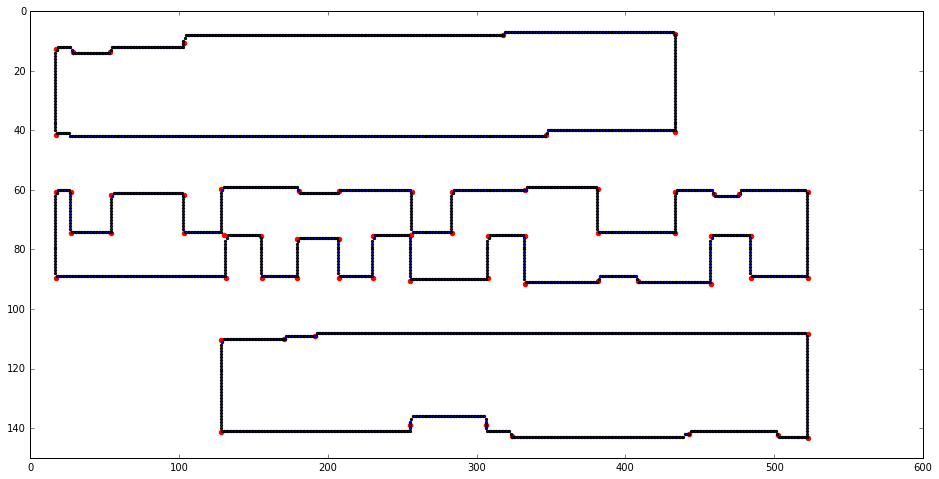

In [71]:
fig=plt.figure(figsize=(16,8))
ax=fig.add_subplot(111)
plt.ylim(150,0)
plt.xlim(0,600)
plt.scatter(points[:,0],points[:,1],marker='o',color='r')
plt.scatter(ans[:,0],ans[:,1],marker='.')
#for xy0 in points:
#    xy=tuple(xy0)
#    ax.annotate('(%4.1f,%4.1f)'%(xy),xy=xy)

In [74]:
# Now draw them
res = np.hstack((centroids,corners))
res = np.int0(res)
img[res[:,1],res[:,0]]=[0,0,255]
img[res[:,3],res[:,2]] = [0,255,0]

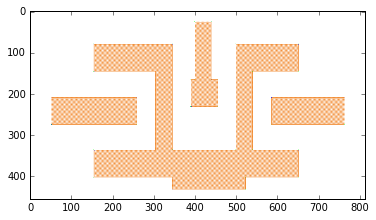

In [75]:
plt.imshow(img ,cmap = 'gray')